## Import packages

In [1]:
# Import packages
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
# sys.path.append(os.path.dirname(__file__)) # Does not work with jupyter notebooks
from src.model import OccupantModel

## Local data files 

In [2]:
# Read a local files
df = pd.read_hdf('input_data/sample_data1_stp_processed.h5')
TM_occupancy = pd.read_csv('input_data/transition_matrix.csv')
TM_habitual = pd.read_csv('input_data/TM_habitual.csv')
model_regressor = pickle.load(open('input_data/model_regressor.pkl','rb'))
model_classification = pickle.load(open('input_data/model_classification.pkl','rb'))

## Initiate the occupant model

In [3]:

sim_sampling_frequency = 5 # minutes -> cannot exceed this interval as the TM's are not available for a lower frequency
# TODO: To add raise value error if the value is higher thatn 5 minutes
# Initiate OccupantModel
Occup_model = OccupantModel(units='F', N_homes= 1, N_occupants_in_home=1,
                            sampling_frequency=sim_sampling_frequency,
                            TM_occupancy = TM_occupancy, TM_habitual = TM_habitual,
                            model_class = model_classification,
                            model_regres=model_regressor )

Occupant created, ID: 0


## Simulate the model for a day

In [4]:
t = []
T_stp_heat = []
T_stp_cool = []
# Simulate the occupant model for specific timesteps
for timeStepN in range(0,int((1440)/sim_sampling_frequency)):
    t.append(timeStepN)  # For plotting

    Occup_model.step(ip_data_env= {'T_in':df.loc[timeStepN,'T_ctrl'],
                            'T_stp_cool':df.loc[timeStepN,'T_stp_cool'],
                            'T_stp_heat':df.loc[timeStepN,'T_stp_heat'],
                            'hum':df.loc[timeStepN,'hum'],
                            'T_out':df.loc[timeStepN,'T_out'],
                            'mo':None,
                            'equip_run_heat':df.loc[timeStepN,'equip_run_heat'],
                            'equip_run_cool':df.loc[timeStepN,'equip_run_cool']
                            },T_var_names=['T_in','T_stp_cool','T_stp_heat','T_out'])
    for agents in Occup_model.schedule.agents:
        T_stp_heat.append(agents.output['T_stp_heat'])
        T_stp_cool.append(agents.output['T_stp_cool'])
sns.set()


Time step: 0
Occupant idN: 0 simulated
Time step: 1
Occupant idN: 0 simulated
Time step: 2
Occupant idN: 0 simulated
Time step: 3
Occupant idN: 0 simulated
Time step: 4
Occupant idN: 0 simulated
Time step: 5
Occupant idN: 0 simulated
Time step: 6
Occupant idN: 0 simulated
Time step: 7
Occupant idN: 0 simulated
Time step: 8
Occupant idN: 0 simulated
Time step: 9
Occupant idN: 0 simulated
Time step: 10
Occupant idN: 0 simulated
Time step: 11
Occupant idN: 0 simulated
Time step: 12
Occupant idN: 0 simulated
Time step: 13
Occupant idN: 0 simulated
Time step: 14
Occupant idN: 0 simulated
Time step: 15
Occupant idN: 0 simulated
Time step: 16
Occupant idN: 0 simulated
Time step: 17
Occupant idN: 0 simulated
Time step: 18
Occupant idN: 0 simulated
Time step: 19
Occupant idN: 0 simulated
Time step: 20
Occupant idN: 0 simulated
Time step: 21
Occupant idN: 0 simulated
Time step: 22
Occupant idN: 0 simulated
Time step: 23
Occupant idN: 0 simulated
Time step: 24
Occupant idN: 0 simulated
Time step:

## Visualize the overrides

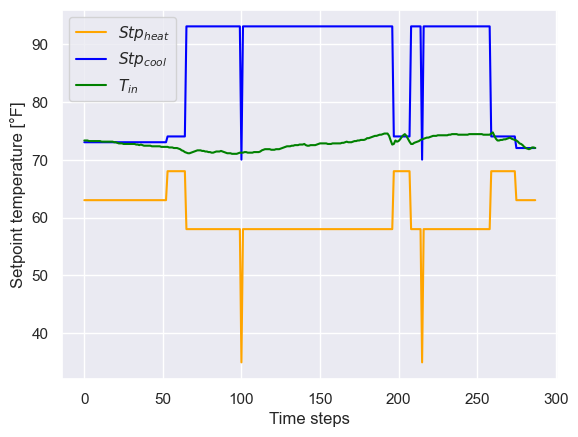

In [5]:
from turtle import color


sns.set()
fig = sns.lineplot(x=t,y=T_stp_heat,color='orange')
sns.lineplot(x=t,y=T_stp_cool,color='blue')
sns.lineplot(x=t,y=df.loc[0:287,'T_ctrl'],color='green')

fig.set_xlabel('Time steps')
fig.set_ylabel('Setpoint temperature [°F]')
fig.legend(labels=['$Stp_{heat}$', '$Stp_{cool}$', '$T_{in}$'])